In [47]:
import ast
import pandas as pd
import statsmodels.api as sm

# Load your dataset
df = pd.read_csv('data_with_diversity.csv')  # Replace with your actual file path

# Convert 'genres' from string of list to actual list and then get dummies
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))
df_genres = df['genres'].explode().str.get_dummies().groupby(level=0).sum()

# Convert 'rating' to dummy variables
df_ratings = pd.get_dummies(df['rating'])

# Merge the genres and ratings back to the main dataframe
df = pd.concat([df, df_genres, df_ratings], axis=1)
df = pd.concat([df, df_ratings], axis=1)

print(df_ratings.columns)



# Convert 'duration' to a numerical value (in minutes)
df['duration'] = df['duration'].apply(lambda x: int(x.split('h')[0].strip()) * 60 + int(x.split('h')[1].split('m')[0].strip()))


# Remove non-numeric characters from 'Production Budget', 'Domestic Gross', 'WorldwideGross'
df['Production Budget'] = pd.to_numeric(df['Production Budget'], errors='coerce') 
df['Domestic Gross'] = pd.to_numeric(df['Domestic Gross'].str.replace('[\$,]', '', regex=True), errors='coerce')
df['WorldwideGross'] = pd.to_numeric(df['WorldwideGross'], errors='coerce')

# Calculate profitability if not already calculated
df['profitability'] = df['WorldwideGross'] - df['Production Budget']


Index(['G', 'NC-17', 'PG', 'PG-13', 'R', 'TVG', 'TVMA'], dtype='object')


                            OLS Regression Results                            
Dep. Variable:          profitability   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     40.41
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          1.28e-171
Time:                        22:46:06   Log-Likelihood:                -47033.
No. Observations:                2322   AIC:                         9.412e+04
Df Residuals:                    2294   BIC:                         9.428e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 1.8e+07   1.24

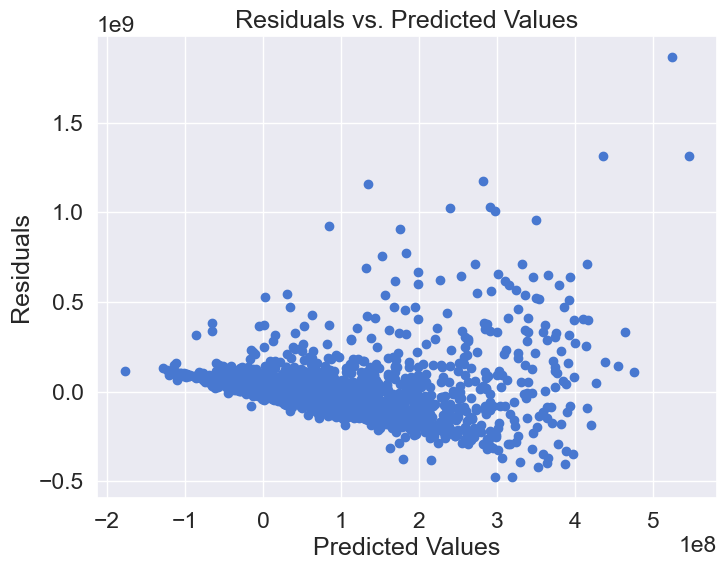

In [65]:
# Define your independent variables, including genre and rating dummies
independent_vars = ['diversity_score', 'tomatometer', 'audience_score', 'weighted_score', 'duration', 'year'] + list(df_genres.columns) 
X = df[independent_vars]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = df['profitability']

# Fit the model
X = df[independent_vars]

# Define your dependent variable
y = df['profitability']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X, missing='drop').fit()  # 'missing='drop'' will drop rows with missing values

# Print the summary
print(model.summary())


#graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})
plt.figure(figsize=(8,6))
plt.scatter(model.predict(X), model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()



In [60]:
df['low_diversity'] = (df['diversity_score'] <= df['diversity_score'].median()).astype(int)

#print median
print(df['diversity_score'].median())
import statsmodels.api as sm

# Assuming other independent variables (like genre, budget, year) are ready for analysis
independent_vars = ['low_diversity', 'Production Budget', 'year']   # Add other relevant variables



# Audience Score Model
X = df[independent_vars]
X = sm.add_constant(X)
y = df['audience_score']
model_audience = sm.OLS(y, X, missing='drop').fit()

# Tomatometer Model
y = df['tomatometer']
model_tomatometer = sm.OLS(y, X, missing='drop').fit()

# Profitability Model
y = df['profitability']
model_profitability = sm.OLS(y, X, missing='drop').fit()






0.25515690984496725


In [61]:
# Print summaries
print("Audience Score Model:\n", model_audience.summary())


Audience Score Model:
                             OLS Regression Results                            
Dep. Variable:         audience_score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     41.34
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           5.05e-26
Time:                        22:45:08   Log-Likelihood:                -10162.
No. Observations:                2322   AIC:                         2.033e+04
Df Residuals:                    2318   BIC:                         2.035e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const          

In [62]:
print("\nTomatometer Model:\n", model_tomatometer.summary())



Tomatometer Model:
                             OLS Regression Results                            
Dep. Variable:            tomatometer   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     22.67
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.84e-14
Time:                        22:45:18   Log-Likelihood:                -10964.
No. Observations:                2322   AIC:                         2.194e+04
Df Residuals:                    2318   BIC:                         2.196e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const            

In [63]:
print("\nProfitability Model:\n", model_profitability.summary())


Profitability Model:
                             OLS Regression Results                            
Dep. Variable:          profitability   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     511.8
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          3.67e-255
Time:                        22:45:25   Log-Likelihood:                -46895.
No. Observations:                2322   AIC:                         9.380e+04
Df Residuals:                    2318   BIC:                         9.382e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const          

Budget's Impact on Diversity Score:
                             OLS Regression Results                            
Dep. Variable:        diversity_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.432
Date:                Fri, 17 Nov 2023   Prob (F-statistic):             0.0641
Time:                        22:45:30   Log-Likelihood:                 1928.7
No. Observations:                2322   AIC:                            -3853.
Df Residuals:                    2320   BIC:                            -3842.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
c

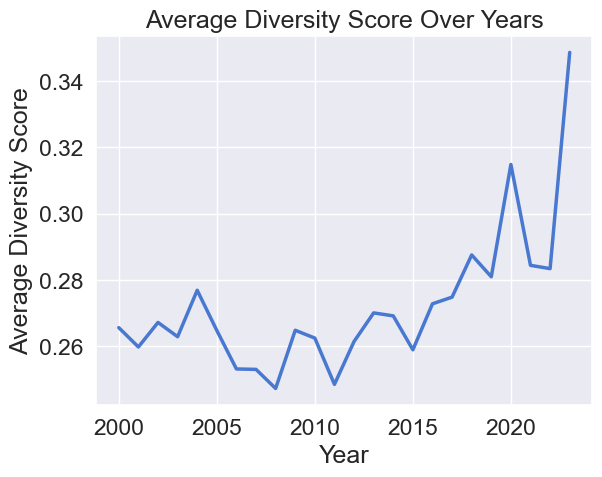

Year's Impact on Diversity Score:
                             OLS Regression Results                            
Dep. Variable:        diversity_score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     18.76
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.55e-05
Time:                        22:45:30   Log-Likelihood:                 1936.3
No. Observations:                2322   AIC:                            -3869.
Df Residuals:                    2320   BIC:                            -3857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.

In [64]:
# Regression analysis for production budget's impact on diversity score
X = df[['Production Budget']]
X = sm.add_constant(X)
y = df['diversity_score']

model_budget_diversity = sm.OLS(y, X).fit()
print("Budget's Impact on Diversity Score:\n", model_budget_diversity.summary())

# Visualization of diversity scores over the years
df.groupby('year')['diversity_score'].mean().plot(kind='line', title='Average Diversity Score Over Years')
plt.xlabel('Year')
plt.ylabel('Average Diversity Score')
plt.show()

# Regression analysis for year's impact on diversity score
X = df[['year']]
X = sm.add_constant(X)
y = df['diversity_score']

model_year_diversity = sm.OLS(y, X).fit()
print("Year's Impact on Diversity Score:\n", model_year_diversity.summary())

# Regression analysis for diversity score's impact on profitability
X = df[['diversity_score', 'Production Budget']]  # Add other control variables if relevant
X = sm.add_constant(X)
y = df['profitability']

model_diversity_profitability = sm.OLS(y, X).fit()
print("Diversity Score's Impact on Profitability:\n", model_diversity_profitability.summary())


In [66]:
# Assuming df_genres is a DataFrame where each column represents a genre and contains binary values (0 or 1)
genre_counts = df_genres.sum().sort_values(ascending=False)
top_10_genres = genre_counts.head(10).index.tolist()
print("Top 10 genres:", top_10_genres)


Top 10 genres: ['Drama', 'Comedy', 'Mystery & Thriller', 'Action', 'Adventure', 'Fantasy', 'Romance', 'Horror', 'Kids & Family', 'Sci-Fi']


KeyError: "['title' 'year'] not found in axis"

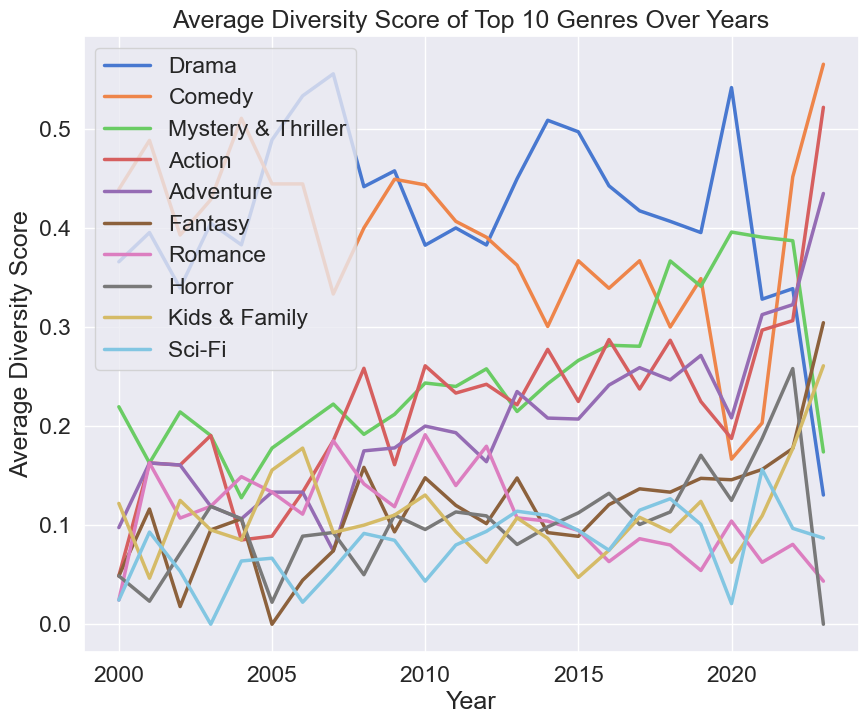

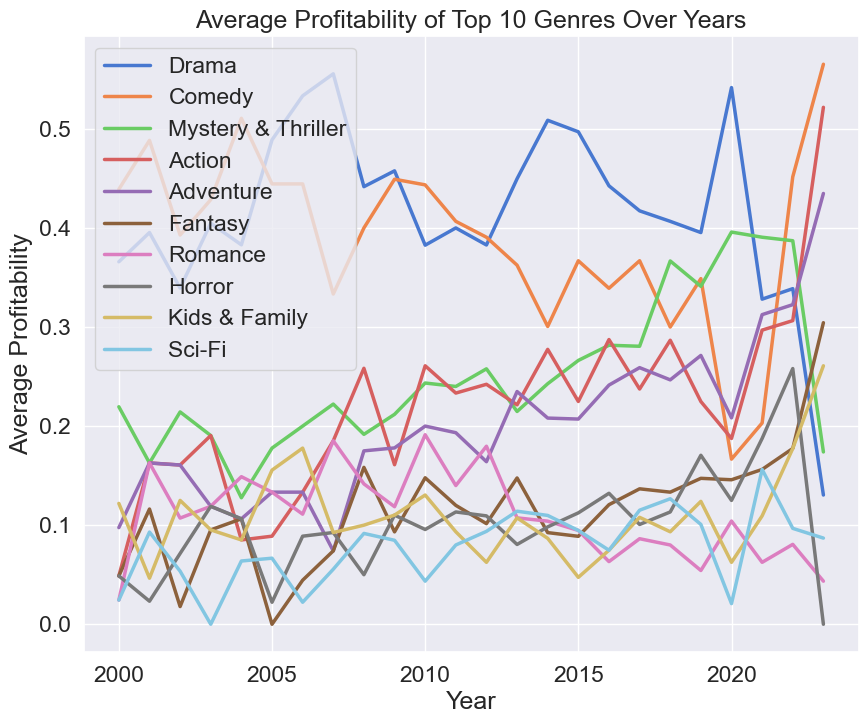

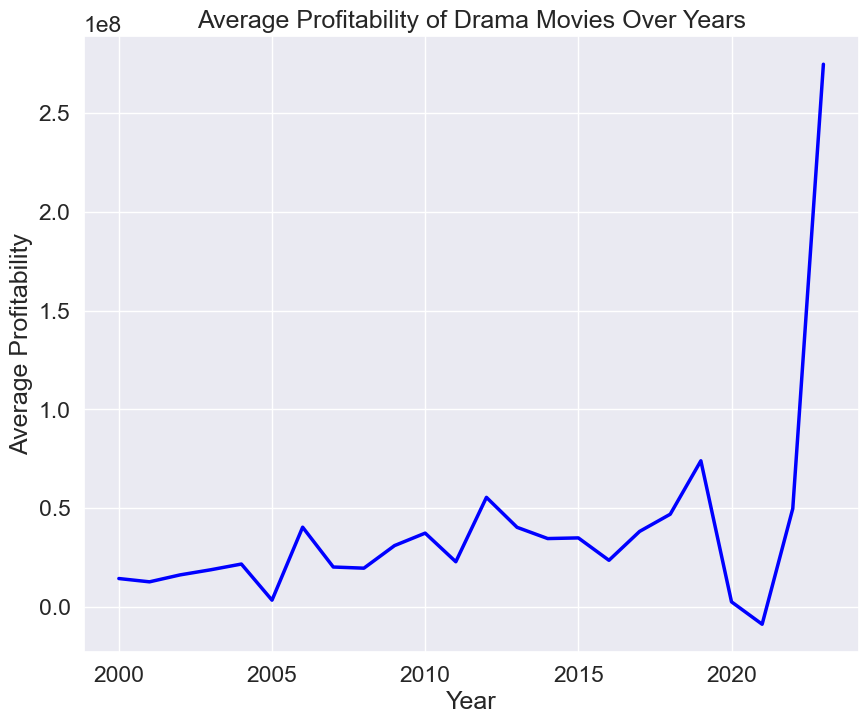

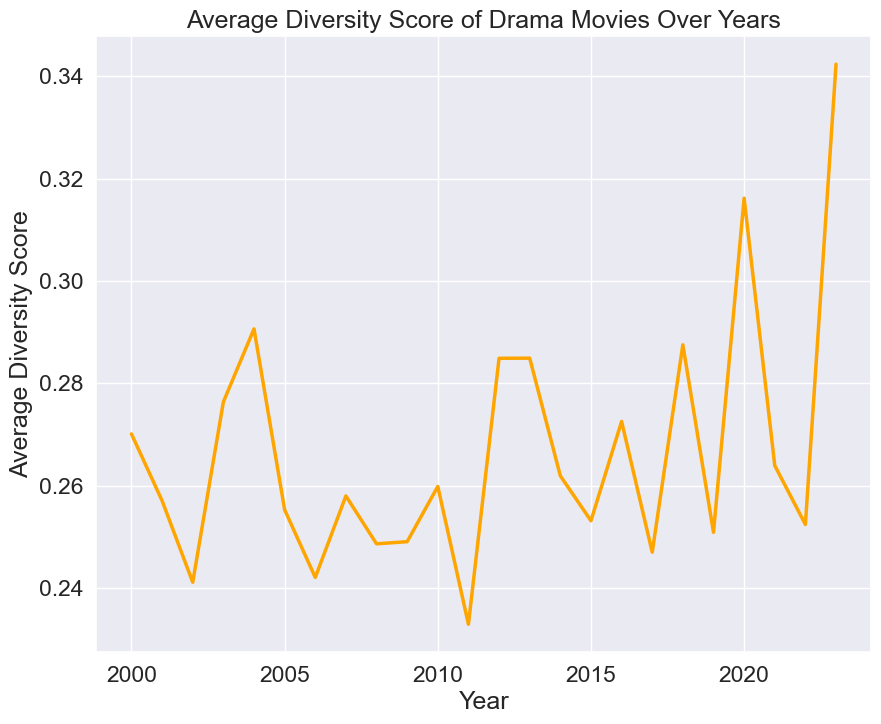

In [75]:
#graph diversity scores of the top 10 genres
df_top_genres.groupby('year')[top_10_genres].mean().plot(kind='line', figsize=(10,8))
plt.xlabel('Year')
plt.ylabel('Average Diversity Score')
plt.title('Average Diversity Score of Top 10 Genres Over Years')
plt.show()

#graph profitability of the top 10 genres
df_top_genres.groupby('year')[top_10_genres].mean().plot(kind='line', figsize=(10,8))
plt.xlabel('Year')
plt.ylabel('Average Profitability')
plt.title('Average Profitability of Top 10 Genres Over Years')
plt.show()


#Profitatbility on Y1 and Diversity score on Y2 for just Drama
df_drama = df[df['Drama'] == 1]
df_drama.groupby('year')['profitability'].mean().plot(kind='line', figsize=(10,8), color='blue')
plt.xlabel('Year')
plt.ylabel('Average Profitability')
plt.title('Average Profitability of Drama Movies Over Years')
plt.show()

df_drama.groupby('year')['diversity_score'].mean().plot(kind='line', figsize=(10,8), color='orange')
plt.xlabel('Year')
plt.ylabel('Average Diversity Score')
plt.title('Average Diversity Score of Drama Movies Over Years')
plt.show()
#Profitatbility on Y1 and Diversity score on Y2 for all movies








In [81]:
# Filter for Drama movies
drama_movies = df[df['Drama'] == 1]

import statsmodels.api as sm

# Define independent variables for the regression
# Here, you can include other variables that you think might influence profitability
independent_vars = ['diversity_score', 'Production Budget', 'year', 'audience_score', 'tomatometer']  # Add other variables as needed
X = drama_movies[independent_vars]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = drama_movies['profitability']

# Create and fit the model
model = sm.OLS(y, X, missing='drop').fit()

# Print the summary of the regression
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:          profitability   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     49.38
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.23e-45
Time:                        23:01:20   Log-Likelihood:                -19262.
No. Observations:                 979   AIC:                         3.854e+04
Df Residuals:                     973   BIC:                         3.857e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -1.73e+09   1.05e+0